In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('drive/My Drive')

In [4]:
cd darknet

/content/drive/My Drive/darknet


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
a1=pd.read_csv("final_result_new_v2.csv")
print(a1)
print(a1.drop("companion", axis = 1))
print(a1["companion"])
X = a1.drop("companion", axis = 1)
y = a1["companion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

      Unnamed: 0  label           x  ...  confidence.1.2  count.1.2  companion
0              0      5  325.256836  ...           99.15         30          0
1              1      5  354.194641  ...           98.80         30          0
2              2      5  360.104584  ...           98.39         30          0
3              3      5  541.546082  ...           99.63         17          0
4              4      5  548.711060  ...            0.00          0          0
...          ...    ...         ...  ...             ...        ...        ...
8383        8383      5  352.872131  ...           91.52         28          3
8384        8384      5  377.329163  ...           88.56         29          3
8385        8385      5  277.477753  ...           87.17         26          3
8386        8386      5  261.917877  ...           95.14         15          3
8387        8387      5  409.791443  ...           98.95         17          3

[8388 rows x 32 columns]
      Unnamed: 0  label   

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import label_binarize
# 讀取資料集
a1 = pd.read_csv("final_result_new_v2.csv")
# 劃分訓練集和測試集
features = [x for x in data_all.columns if x not in ['status']]
X = a1.drop("companion", axis = 1)
y = a1["companion"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)
lr = LogisticRegression()  # 邏輯迴歸模型
lr.fit(X_train, y_train)

tr = DecisionTreeClassifier()  # 決策樹模型
tr.fit(X_train, y_train)

svm = SVC()  # SVM模型
svm.fit(X_train, y_train)

# 模型評分

svm_score = svm.score(X_test, y_test)
print(svm_score)

from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y, svm.predict(X),labels=[0,1,2,3])
import numpy as np 
confusion_matrix=np.matrix(confusion_matrix) 
print(confusion_matrix)






NameError: ignored

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd darknet/

[Errno 2] No such file or directory: 'darknet/'
/content


In [ ]:
cd ..

/


In [ ]:
cd darknet/

/content/drive/MyDrive/darknet


In [ ]:
ls


3rdparty/                obj/                      yolov4.weights.16
backup/                  output1.csv               yolov4.weights.17
build/                   output2.csv               yolov4.weights.18
build.ps1                output3.csv               yolov4.weights.19
build.sh                 output4.csv               yolov4.weights.2
cfg/                     output5.csv               yolov4.weights.20
cmake/                   output6.csv               yolov4.weights.21
CMakeLists.txt           output7.csv               yolov4.weights.22
darknet                  __pycache__/              yolov4.weights.23
DarknetConfig.cmake.in   README.md                 yolov4.weights.24
darknet_images.py        result_back.csv           yolov4.weights.25
Darknet_MergeData.py     result.csv                yolov4.weights.26
darknet.py               result_LabelEncoding.csv  yolov4.weights.27
darknet_video.py         results/                  yolov4.weights.28
data/                    result上下.c

Confusion matrix, without normalization
[[1448    0    0]
 [ 178    0    0]
 [ 471    0    0]]
Normalized confusion matrix
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


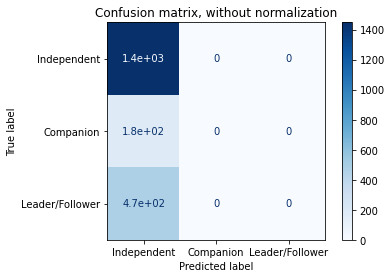

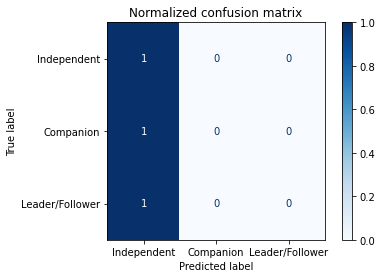

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

a1 = pd.read_csv("final_result_new_v2_012.csv")
X = a1.drop("companion", axis = 1)
y = a1["companion"]
class_names = ['Independent', 'Companion', 'Leader/Follower']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()